In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.DoubleWell import DoubleWellEnergy
from Utils import plot_distribution
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from FittedModels.utils import plot_distributions, plot_samples, plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.MoG import MoG
from TargetDistributions.Guassian_FullCov import Guassian_FullCov
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution, expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.experimental.train_AIS import AIS_trainer
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.MoG import MoG
from TargetDistributions.MoG import custom_MoG

In [3]:
target = DoubleWellEnergy(2, a=-0.5, b=-6)

In [4]:
from Utils import plot_distribution

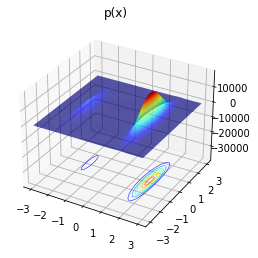

In [5]:
dist = plot_distribution(target, bounds=[[-3, 3], [-3, 3]], n_points=300)

# Let's fit with KL

In [6]:
dim=2
n_samples_estimation = int(1e3)
torch.manual_seed(0) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3, scaling_factor=2) # , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl") 
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

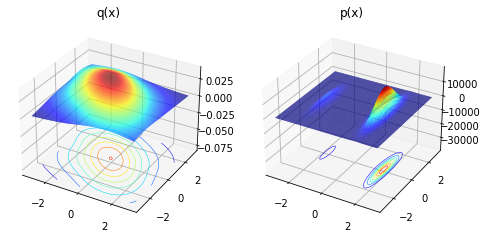

In [7]:
fig_before_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

In [8]:
history = tester.train(1000, batch_size=100) # epochs 1000

loss: -8.46059799194336, mean log p_x 6.058484077453613: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.47it/s]


In [9]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 207409.96875 
estimate after training is 26542.064453125 
effective sample size before is 0.0027339053340256214 out of 1000
effective sample size after train is 0.0038401742931455374  out of 1000
variance in weights is 0.0002594050602056086


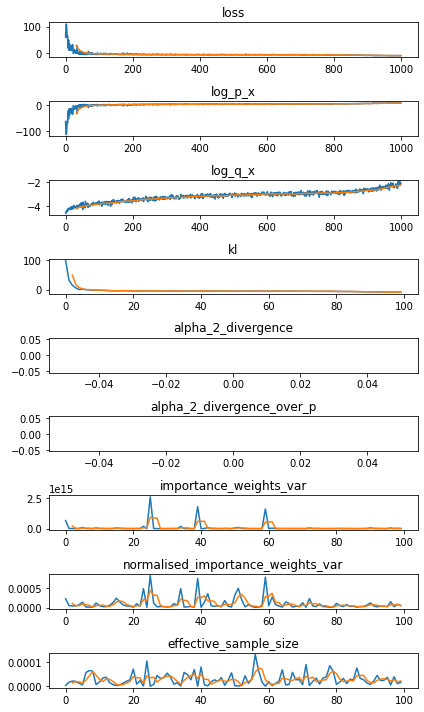

In [10]:
hist_fig = plot_history(history)

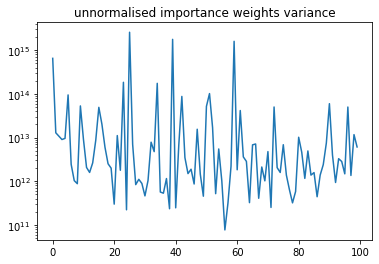

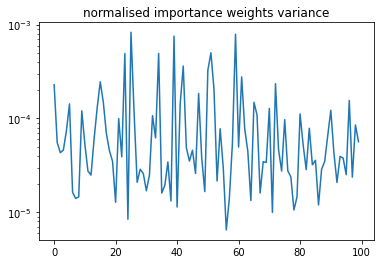

In [11]:
plot_sampling_info(history)

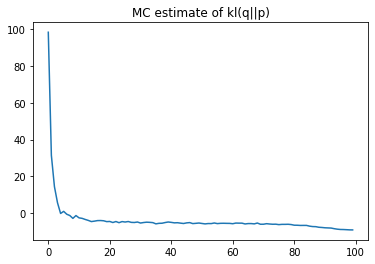

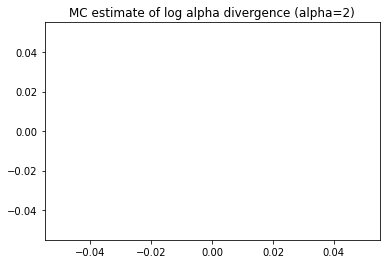

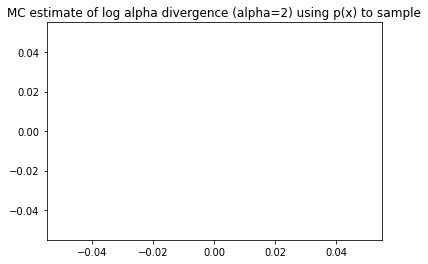

In [12]:
plot_divergences(history)

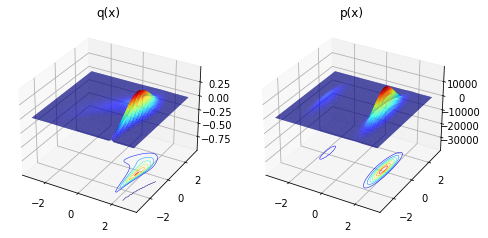

In [13]:
fig_after_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

# Let's fit with alpha divergence

In [6]:
dim=2
n_samples_estimation = int(1e3)
torch.manual_seed(0) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3, scaling_factor=2) # , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG") 
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

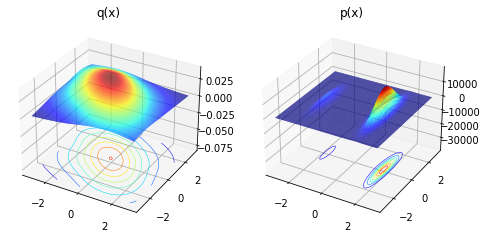

In [7]:
fig_before_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)

In [8]:
history = tester.train(1000, batch_size=100) # epochs 1000

  0%|                                                                                                                                                         | 0/1000 [00:00<?, ?it/s]


RuntimeError: shape '[1, 100]' is invalid for input of size 10000

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
hist_fig = plot_history(history)

In [ ]:
plot_sampling_info(history)

In [ ]:
plot_divergences(history)

In [ ]:
fig_after_train = plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)